In [243]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import utils
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

Import the Dataset

In [244]:
dataset = pd.read_csv('all_features_by_state_test.csv')

See the length and top 5 rows

In [245]:
len(dataset)
print(dataset.head())

             Unnamed: 0  CensusTract State_x  HUNVFlag_x  LILATracts_1And10_x  \
0  1400000US02013000100   2013000100  Alaska           1                    1   
1  1400000US02016000100   2016000100  Alaska           0                    1   
2  1400000US02016000200   2016000200  Alaska           0                    0   
3  1400000US02020000101   2020000101  Alaska           0                    0   
4  1400000US02020000102   2020000102  Alaska           0                    0   

   LILATracts_halfAnd10_x  LILATracts_Vehicle_x  LATracts1_y  LATracts10_y  \
0                       1                     1            1             1   
1                       1                     1            1             1   
2                       0                     0            1             0   
3                       0                     0            1             0   
4                       0                     0            1             0   

   LATracts20_y  ...  B19131_003E_diff  B191

Drop the rows with categorical data, and entropy_diff

In [335]:
clean_dataset = dataset.drop(columns = ['Unnamed: 0','State_x','NAME2010','NAME2015','entropy_diff','Unnamed: 16'])

In [247]:
clean_dataset.shape

(64573, 129)

In [334]:
clean_dataset.head()

,CensusTract,HUNVFlag_x,LILATracts_1And10_x,LILATracts_halfAnd10_x,LILATracts_Vehicle_x,LATracts1_y,LATracts10_y,LATracts20_y,LATracts_half_y,LATracts1_x,LATracts10_x,LATracts20_x,LATracts_half_x,LILATracts_1And20_x,Unnamed: 16,LILATracts_1And10_y,LILATracts_halfAnd10_y,LILATracts_Vehicle_y,LILATracts_1And20_y,LILATracts_1And10_diff,LILATracts_halfAnd10_diff,LILATracts_Vehicle_diff,LILATracts_1And20_diff,LATracts1_diff,LATracts10_diff,LATracts20_diff,LATracts_half_diff,prop_white,prop_black,prop_asian,prop_hisp,prop_nhopi,prop_aian,prop_multir,totalprop,totalpop10,prop_white10,prop_black10,prop_asian10,prop_hisp10,prop_nhopi10,prop_aian10,prop_multir10,Unnamed: 0_x,STATE2010,B01001_001E2010,B01001_002E2010,B01001_026E2010,B01002_001E2010,B01003_001E2010,B19037_001E2010,B19001_001E2010,B17023_001E2010,B17020A_014E2010,B08303_002E2010,B08303_010E2010,B08301_010E2010,B08301_002E2010,B08202_004E2010,B08202_020E2010,B08137_002E2010,B19326_001E2010,B19301_001E2010,B19131_002E2010,B19131_003E2010,B19126_001E2010,B03002_009E2010,B03002_010E2010,B03002_011E2010,state2010,county2010,tract2010,Unnamed: 0_y,STATE2015,B01001_001E2015,B01001_002E2015,B01001_026E2015,B01002_001E2015,B01003_001E2015,B19037_001E2015,B19001_001E2015,B17023_001E2015,B17020A_014E2015,B08303_002E2015,B08303_010E2015,B08301_010E2015,B08301_002E2015,B08202_004E2015,B08202_020E2015,B08137_002E2015,B19326_001E2015,B19301_001E2015,B19131_002E2015,B19131_003E2015,B19126_001E2015,B03002_009E2015,B03002_010E2015,B03002_011E2015,state2015,county2015,tract2015,B01001_001E_diff,B01001_002E_diff,B01001_026E_diff,B01002_001E_diff,B01003_001E_diff,B19037_001E_diff,B19001_001E_diff,B17023_001E_diff,B17020A_014E_diff,B08303_002E_diff,B08303_010E_diff,B08301_010E_diff,B08301_002E_diff,B08202_004E_diff,B08202_020E_diff,B08137_002E_diff,B19326_001E_diff,B19301_001E_diff,B19131_002E_diff,B19131_003E_diff,B19126_001E_diff,B03002_009E_diff,B03002_010E_diff,B03002_011E_diff,entropy_index10_y,entropy_index15_x,HUNVFlag_y,HUNVFlag_diff
0,2013000100,1,1,1,1,1,1,1,1,0,1,1,0,1,NaN,1,1,1,1,0,0,0,0,-1,0,0,-1,0.187181,0.062110,0.320476,0.109189,0.005389,0.248440,0.067215,1,3701,0.057012,0.102405,0.522561,0.154823,0.005944,0.116455,0.040800,66,2,3703,2662,1041,38.5,3703,267,267,165,21,1370,0,0,185,72,11,131,21138,22279.0,92,40,61250,151,0,151,2,13,100,1,2,3304,2198,1106,42.4,3304,690,690,424,493,904,0,12,583,234,46,509,24189.0,28608.0,251,112,63913.0,105,0,105,2,13,100,-399,-464,65,3.9,-399,423,423,259,472,-466,0,12,398,162,35,378,3051.0,6329.0,159,72,2663.0,-46,0,-46,1.436035,1.648337,1,0
1,2016000100,0,1,1,1,1,1,1,1,0,1,1,0,1,NaN,1,1,1,1,0,0,0,0,-1,0,0,-1,0.232129,0.025703,0.142972,0.048193,0.005622,0.473092,0.072289,1,1774,0.349493,0.182074,0.182638,0.007328,0.065389,0.176437,0.036640,67,2,1774,1346,428,39.2,1774,166,166,96,0,822,0,0,241,45,5,89,26600,41465.0,59,17,56667,65,0,65,2,16,100,2,2,1065,668,397,39.6,1065,264,264,169,116,113,0,0,297,94,18,235,23784.0,31536.0,93,39,55313.0,30,0,30,2,16,100,-709,-678,-31,0.4,-709,98,98,73,116,-709,0,0,56,49,13,146,-2816.0,-9929.0,34,22,-1354.0,-35,0,-35,1.629681,1.430492,0,0
2,2016000200,0,0,0,0,1,0,0,1,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,-1,0,0,-1,0.340143,0.059500,0.283221,0.132090,0.019040,0.053154,0.112852,1,4483,0.193843,0.077180,0.405309,0.259871,0.015391,0.025429,0.022976,68,2,4485,3435,1050,42.5,4485,355,355,204,58,1085,0,40,479,138,13,126,21335,25353.0,149,87,95000,103,0,103,2,16,200,3,2,4619,2725,1894,36.2,4619,874,874,519,1078,372,0,0,1586,337,65,448,27512.0,31804.0,395,239,99327.0,220,0,220,2,16,200,134,-710,844,-6.3,134,519,519,315,1020,-713,0,-40,1107,199,52,322,6177.0,6451.0,246,152,4327.0,117,0,117,1.476288,1.636992,0,0
3,2020000101,0,0,0,0,1,0,0,1,1,0,0,1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0.832801,0.009588,0.012279,0.035156,0.000673,0.049622,0.059882,1,5466,0.862788,0.005306,0.005488,0.046469,0.000183,0.039151,0.040615,69,2,5475,2699,2776,37.4,5475,1796,1796,1496,567,75,318,61,2518,763,282,2390,43565,36405.0,1360,704,110854,222,0,222,2,20,101,4,

In [333]:
pd.set_option('display.max_columns', None)

In [336]:
clean_dataset.dropna()

,CensusTract,HUNVFlag_x,LILATracts_1And10_x,LILATracts_halfAnd10_x,LILATracts_Vehicle_x,LATracts1_y,LATracts10_y,LATracts20_y,LATracts_half_y,LATracts1_x,LATracts10_x,LATracts20_x,LATracts_half_x,LILATracts_1And20_x,LILATracts_1And10_y,LILATracts_halfAnd10_y,LILATracts_Vehicle_y,LILATracts_1And20_y,LILATracts_1And10_diff,LILATracts_halfAnd10_diff,LILATracts_Vehicle_diff,LILATracts_1And20_diff,LATracts1_diff,LATracts10_diff,LATracts20_diff,LATracts_half_diff,prop_white,prop_black,prop_asian,prop_hisp,prop_nhopi,prop_aian,prop_multir,totalprop,totalpop10,prop_white10,prop_black10,prop_asian10,prop_hisp10,prop_nhopi10,prop_aian10,prop_multir10,Unnamed: 0_x,STATE2010,B01001_001E2010,B01001_002E2010,B01001_026E2010,B01002_001E2010,B01003_001E2010,B19037_001E2010,B19001_001E2010,B17023_001E2010,B17020A_014E2010,B08303_002E2010,B08303_010E2010,B08301_010E2010,B08301_002E2010,B08202_004E2010,B08202_020E2010,B08137_002E2010,B19326_001E2010,B19301_001E2010,B19131_002E2010,B19131_003E2010,B19126_001E2010,B03002_009E2010,B03002_010E2010,B03002_011E2010,state2010,county2010,tract2010,Unnamed: 0_y,STATE2015,B01001_001E2015,B01001_002E2015,B01001_026E2015,B01002_001E2015,B01003_001E2015,B19037_001E2015,B19001_001E2015,B17023_001E2015,B17020A_014E2015,B08303_002E2015,B08303_010E2015,B08301_010E2015,B08301_002E2015,B08202_004E2015,B08202_020E2015,B08137_002E2015,B19326_001E2015,B19301_001E2015,B19131_002E2015,B19131_003E2015,B19126_001E2015,B03002_009E2015,B03002_010E2015,B03002_011E2015,state2015,county2015,tract2015,B01001_001E_diff,B01001_002E_diff,B01001_026E_diff,B01002_001E_diff,B01003_001E_diff,B19037_001E_diff,B19001_001E_diff,B17023_001E_diff,B17020A_014E_diff,B08303_002E_diff,B08303_010E_diff,B08301_010E_diff,B08301_002E_diff,B08202_004E_diff,B08202_020E_diff,B08137_002E_diff,B19326_001E_diff,B19301_001E_diff,B19131_002E_diff,B19131_003E_diff,B19126_001E_diff,B03002_009E_diff,B03002_010E_diff,B03002_011E_diff,entropy_index10_y,entropy_index15_x,HUNVFlag_y,HUNVFlag_diff
0,2013000100,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,0,0,0,-1,0,0,-1,0.187181,0.062110,0.320476,0.109189,0.005389,0.248440,0.067215,1,3701,0.057012,0.102405,0.522561,0.154823,0.005944,0.116455,0.040800,66,2,3703,2662,1041,38.5,3703,267,267,165,21,1370,0,0,185,72,11,131,21138,22279.0,92,40,61250,151,0,151,2,13,100,1,2,3304,2198,1106,42.4,3304,690,690,424,493,904,0,12,583,234,46,509,24189.0,28608.0,251,112,63913.0,105,0,105,2,13,100,-399,-464,65,3.9,-399,423,423,259,472,-466,0,12,398,162,35,378,3051.0,6329.0,159,72,2663.0,-46,0,-46,1.436035,1.648337,1,0
1,2016000100,0,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,0,0,0,-1,0,0,-1,0.232129,0.025703,0.142972,0.048193,0.005622,0.473092,0.072289,1,1774,0.349493,0.182074,0.182638,0.007328,0.065389,0.176437,0.036640,67,2,1774,1346,428,39.2,1774,166,166,96,0,822,0,0,241,45,5,89,26600,41465.0,59,17,56667,65,0,65,2,16,100,2,2,1065,668,397,39.6,1065,264,264,169,116,113,0,0,297,94,18,235,23784.0,31536.0,93,39,55313.0,30,0,30,2,16,100,-709,-678,-31,0.4,-709,98,98,73,116,-709,0,0,56,49,13,146,-2816.0,-9929.0,34,22,-1354.0,-35,0,-35,1.629681,1.430492,0,0
2,2016000200,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,-1,0.340143,0.059500,0.283221,0.132090,0.019040,0.053154,0.112852,1,4483,0.193843,0.077180,0.405309,0.259871,0.015391,0.025429,0.022976,68,2,4485,3435,1050,42.5,4485,355,355,204,58,1085,0,40,479,138,13,126,21335,25353.0,149,87,95000,103,0,103,2,16,200,3,2,4619,2725,1894,36.2,4619,874,874,519,1078,372,0,0,1586,337,65,448,27512.0,31804.0,395,239,99327.0,220,0,220,2,16,200,134,-710,844,-6.3,134,519,519,315,1020,-713,0,-40,1107,199,52,322,6177.0,6451.0,246,152,4327.0,117,0,117,1.476288,1.636992,0,0
4,2020000102,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,-1,0.804212,0.008791,0.022161,0.036813,0.002198,0.052381,0.073443,1,4242,0.774399,0.000236,0.008487,0.105375,0.000236,0.051391,0.059877,70,2,4240,2059,2181,42.1,4240,1654,1654,1071,345,40,174,20,2007,508,97,1668,36855,37102.0,860,395,91542,254,0,254,2,20,102,5,2,5606,2959,2647,32.7,5606,19

In [337]:
clean_dataset.shape

(64573, 128)

Replace NAN's with zeros

Split dataset into train and test data. I decided to use 20% of the test data to train my model

In [339]:
x = clean_dataset.iloc[:, 0:126]
y = clean_dataset.iloc[:, 127]
y=y.astype('int')
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state = 1, test_size=0.2)

In [349]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(51658, 126)
(51658,)
(12915, 126)
(12915,)


Then, feature scaling on the training data to normalize it before we input. Also, make sure both the test and train data are transformed.

In [340]:
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


Define the model: Create KNN Classifier

In [341]:
from sklearn.model_selection import cross_val_predict
classifier = KNeighborsClassifier(n_neighbors = 113,p=3, metric = 'euclidean')

Fit the model

In [254]:
# lab_enc = preprocessing.LabelEncoder()
# encoded = lab_enc.fit_transform(y_train)
# print(utils.multiclass.type_of_target(y_train.astype('int')))
# y_pred = cross_val_predict(classifier,x,y,cv = 5)

In [255]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(y_train)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(y_train))

50362    0
43332   -1
8309     0
59229    0
21318    0
        ..
32511    0
5192     1
12172    0
33003    0
62501    0
Name: HUNVFlag_diff, Length: 51658, dtype: int64
multiclass
multiclass
multiclass


The amount of Nearest Neightbors - take the square root of the number of data points divided by two. While this technique is not entirely accurate but is fast 

In [256]:
import math
math.sqrt(len(y_test))

113.64418154925487

In [352]:
x_train.dtype

dtype('float64')

In [354]:
clean_dataset.dtypes

CensusTract                 int64
HUNVFlag_x                  int64
LILATracts_1And10_x         int64
LILATracts_halfAnd10_x      int64
LILATracts_Vehicle_x        int64
                           ...   
B03002_011E_diff            int64
entropy_index10_y         float64
entropy_index15_x         float64
HUNVFlag_y                  int64
HUNVFlag_diff               int64
Length: 128, dtype: object

Build the model 

In [344]:
clean_dataset.describe()

,CensusTract,HUNVFlag_x,LILATracts_1And10_x,LILATracts_halfAnd10_x,LILATracts_Vehicle_x,LATracts1_y,LATracts10_y,LATracts20_y,LATracts_half_y,LATracts1_x,LATracts10_x,LATracts20_x,LATracts_half_x,LILATracts_1And20_x,LILATracts_1And10_y,LILATracts_halfAnd10_y,LILATracts_Vehicle_y,LILATracts_1And20_y,LILATracts_1And10_diff,LILATracts_halfAnd10_diff,LILATracts_Vehicle_diff,LILATracts_1And20_diff,LATracts1_diff,LATracts10_diff,LATracts20_diff,LATracts_half_diff,prop_white,prop_black,prop_asian,prop_hisp,prop_nhopi,prop_aian,prop_multir,totalprop,totalpop10,prop_white10,prop_black10,prop_asian10,prop_hisp10,prop_nhopi10,prop_aian10,prop_multir10,Unnamed: 0_x,STATE2010,B01001_001E2010,B01001_002E2010,B01001_026E2010,B01002_001E2010,B01003_001E2010,B19037_001E2010,B19001_001E2010,B17023_001E2010,B17020A_014E2010,B08303_002E2010,B08303_010E2010,B08301_010E2010,B08301_002E2010,B08202_004E2010,B08202_020E2010,B08137_002E2010,B19326_001E2010,B19301_001E2010,B19131_002E2010,B19131_003E2010,B19126_001E2010,B03002_009E2010,B03002_010E2010,B03002_011E2010,state2010,county2010,tract2010,Unnamed: 0_y,STATE2015,B01001_001E2015,B01001_002E2015,B01001_026E2015,B01002_001E2015,B01003_001E2015,B19037_001E2015,B19001_001E2015,B17023_001E2015,B17020A_014E2015,B08303_002E2015,B08303_010E2015,B08301_010E2015,B08301_002E2015,B08202_004E2015,B08202_020E2015,B08137_002E2015,B19326_001E2015,B19301_001E2015,B19131_002E2015,B19131_003E2015,B19126_001E2015,B03002_009E2015,B03002_010E2015,B03002_011E2015,state2015,county2015,tract2015,B01001_001E_diff,B01001_002E_diff,B01001_026E_diff,B01002_001E_diff,B01003_001E_diff,B19037_001E_diff,B19001_001E_diff,B17023_001E_diff,B17020A_014E_diff,B08303_002E_diff,B08303_010E_diff,B08301_010E_diff,B08301_002E_diff,B08202_004E_diff,B08202_020E_diff,B08137_002E_diff,B19326_001E_diff,B19301_001E_diff,B19131_002E_diff,B19131_003E_diff,B19126_001E_diff,B03002_009E_diff,B03002_010E_diff,B03002_011E_diff,entropy_index10_y,entropy_index15_x,HUNVFlag_y,HUNVFlag_diff
count,6.457300e+04,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.00000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.0,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,6.457300e+04,6.457200e+04,64573.000000,64573.000000,6.457300e+04,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,6.457300e+04,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,6.280900e+04,6.457200e+04,64573.000000,64573.000000,1.837100e+04,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,6.457300e+04,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,6.280900e+04,6.457100e+04,64573.000000,64573.000000,1.837100e+04,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000,64573.000000
mean,2.648042e+10,0.230437,0.128661,0.283152,0.155560,0.590278,0.046382,0.006009,0.892680,0.333018,0.043408,0.005498,0.635142,0.113763,0.124495,0.271878,0.148870,0.108513,0.004166,0.011274,0.006690,0.00525,-0.257259,-0.002973,-0.000511,-0.257538,0.656984,0.115697,0.036826,0.113009,0.001514,0.009049,0.066922,1.0,4191.230421,0.654787,0.124

In [342]:
classifier.fit(x_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [346]:
x_train

array([[ 0.87495837, -0.54754107, -0.38511402, ..., -0.54711707,
        -1.22861961, -1.49701827],
       [ 0.66068549, -0.54754107, -0.38511402, ..., -2.1671063 ,
         0.72631322,  0.59971873],
       [-1.41949056, -0.54754107, -0.38511402, ..., -0.28617921,
         1.69044496,  1.61664725],
       ...,
       [-1.21588714, -0.54754107, -0.38511402, ..., -0.40577573,
        -0.86202516, -0.70086219],
       [ 0.03423664, -0.54754107,  2.59663359, ..., -0.88416181,
         0.56430399,  0.3583426 ],
       [ 1.51250448, -0.54754107, -0.38511402, ...,  0.38791027,
         0.55580258,  0.69485197]])

Predict the response for test dataset

In [258]:
y_pred = classifier.predict(x_test)

In [259]:
y_pred
len(y_pred)

12915

Evaluate the Model

In [260]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[  160   736     0]
 [    2 10960    16]
 [    0   784   257]]


Print the Accuracy Score

In [262]:
print(accuracy_score(y_test,y_pred))

0.88091366627952


This is a fair fit for the model at 88%. 

Now, let's plot the data to visualize it

In [267]:
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

Build the model

In [268]:
clustering = KMeans(n_clusters = 3, random_state = 3)
clustering.fit(x_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=3, tol=0.0001, verbose=0)

In [278]:
print(clustering.labels_)

[1 2 0 ... 1 0 0]


Plotting my model output

In [269]:
desert_df = pd.DataFrame(nona_clean_dataset)

In [270]:
nona_clean_dataset.columns.tolist()

['CensusTract',
 'HUNVFlag_x',
 'LILATracts_1And10_x',
 'LILATracts_halfAnd10_x',
 'LILATracts_Vehicle_x',
 'LATracts1_y',
 'LATracts10_y',
 'LATracts20_y',
 'LATracts_half_y',
 'LATracts1_x',
 'LATracts10_x',
 'LATracts20_x',
 'LATracts_half_x',
 'LILATracts_1And20_x',
 'Unnamed: 16',
 'LILATracts_1And10_y',
 'LILATracts_halfAnd10_y',
 'LILATracts_Vehicle_y',
 'LILATracts_1And20_y',
 'LILATracts_1And10_diff',
 'LILATracts_halfAnd10_diff',
 'LILATracts_Vehicle_diff',
 'LILATracts_1And20_diff',
 'LATracts1_diff',
 'LATracts10_diff',
 'LATracts20_diff',
 'LATracts_half_diff',
 'prop_white',
 'prop_black',
 'prop_asian',
 'prop_hisp',
 'prop_nhopi',
 'prop_aian',
 'prop_multir',
 'totalprop',
 'totalpop10',
 'prop_white10',
 'prop_black10',
 'prop_asian10',
 'prop_hisp10',
 'prop_nhopi10',
 'prop_aian10',
 'prop_multir10',
 'Unnamed: 0_x',
 'STATE2010',
 'B01001_001E2010',
 'B01001_002E2010',
 'B01001_026E2010',
 'B01002_001E2010',
 'B01003_001E2010',
 'B19037_001E2010',
 'B19001_001E2010

In [271]:
desert_df.columns = ['CensusTract',
 'HUNVFlag_x',
 'LILATracts_1And10_x',
 'LILATracts_halfAnd10_x',
 'LILATracts_Vehicle_x',
 'LATracts1_y',
 'LATracts10_y',
 'LATracts20_y',
 'LATracts_half_y',
 'LATracts1_x',
 'LATracts10_x',
 'LATracts20_x',
 'LATracts_half_x',
 'LILATracts_1And20_x',
 'Unnamed: 16',
 'LILATracts_1And10_y',
 'LILATracts_halfAnd10_y',
 'LILATracts_Vehicle_y',
 'LILATracts_1And20_y',
 'HUNVFlag_diff',
 'LILATracts_1And10_diff',
 'LILATracts_halfAnd10_diff',
 'LILATracts_Vehicle_diff',
 'LILATracts_1And20_diff',
 'LATracts1_diff',
 'LATracts10_diff',
 'LATracts20_diff',
 'LATracts_half_diff',
 'prop_white',
 'prop_black',
 'prop_asian',
 'prop_hisp',
 'prop_nhopi',
 'prop_aian',
 'prop_multir',
 'totalprop',
 'totalpop10',
 'prop_white10',
 'prop_black10',
 'prop_asian10',
 'prop_hisp10',
 'prop_nhopi10',
 'prop_aian10',
 'prop_multir10',
 'Unnamed: 0_x',
 'STATE2010',
 'B01001_001E2010',
 'B01001_002E2010',
 'B01001_026E2010',
 'B01002_001E2010',
 'B01003_001E2010',
 'B19037_001E2010',
 'B19001_001E2010',
 'B17023_001E2010',
 'B17020A_014E2010',
 'B08303_002E2010',
 'B08303_010E2010',
 'B08301_010E2010',
 'B08301_002E2010',
 'B08202_004E2010',
 'B08202_020E2010',
 'B08137_002E2010',
 'B19326_001E2010',
 'B19301_001E2010',
 'B19131_002E2010',
 'B19131_003E2010',
 'B19126_001E2010',
 'B03002_009E2010',
 'B03002_010E2010',
 'B03002_011E2010',
 'state2010',
 'county2010',
 'tract2010',
 'Unnamed: 0_y',
 'STATE2015',
 'B01001_001E2015',
 'B01001_002E2015',
 'B01001_026E2015',
 'B01002_001E2015',
 'B01003_001E2015',
 'B19037_001E2015',
 'B19001_001E2015',
 'B17023_001E2015',
 'B17020A_014E2015',
 'B08303_002E2015',
 'B08303_010E2015',
 'B08301_010E2015',
 'B08301_002E2015',
 'B08202_004E2015',
 'B08202_020E2015',
 'B08137_002E2015',
 'B19326_001E2015',
 'B19301_001E2015',
 'B19131_002E2015',
 'B19131_003E2015',
 'B19126_001E2015',
 'B03002_009E2015',
 'B03002_010E2015',
 'B03002_011E2015',
 'state2015',
 'county2015',
 'tract2015',
 'B01001_001E_diff',
 'B01001_002E_diff',
 'B01001_026E_diff',
 'B01002_001E_diff',
 'B01003_001E_diff',
 'B19037_001E_diff',
 'B19001_001E_diff',
 'B17023_001E_diff',
 'B17020A_014E_diff',
 'B08303_002E_diff',
 'B08303_010E_diff',
 'B08301_010E_diff',
 'B08301_002E_diff',
 'B08202_004E_diff',
 'B08202_020E_diff',
 'B08137_002E_diff',
 'B19326_001E_diff',
 'B19301_001E_diff',
 'B19131_002E_diff',
 'B19131_003E_diff',
 'B19126_001E_diff',
 'B03002_009E_diff',
 'B03002_010E_diff',
 'B03002_011E_diff',
 'entropy_index10_y',
 'entropy_index15_x',
 'HUNVFlag_y']
y.columns=["HUNVFlag_y"]


In [275]:
clustering

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=3, tol=0.0001, verbose=0)

In [311]:
# color_theme = np.array(['darkgray','lightsalmon','powderblue'])
# plt.subplot(1,2,1)
# plt.scatter(x=desert_df.HUNVFlag_x, y =desert_df.HUNVFlag_y, c = color_theme [desert_df.HUNVFlag_y], s= 50)
# plt.title("Food Desert or not")
# plt.subplot(1,2,2)
# plt.scatter(x= desert_df.HUNVFlag_x,y= desert_df.HUNVFlag_y, c = color_theme[clustering.labels_],s=50 )
# plt.title("K-Means Function")
# if c_none or co is not None:
#             c_array = None
# else:  # <- from the not shown instructions above, c_none is False
#             try:
#                 c_array = np.asanyarray(c, dtype=float)
# if c_array.shape in xy_shape:  # <- True for case *A* => everything will be fine
#                     c = np.ma.ravel(c_array)
# else:  # <- in case *B* c_array.shape == (), while xy_shape == ((1,), (1,))
#                     # Wrong size; it must not be intended for mapping.
#                     c_array = None
#             except ValueError:
#                 # Failed to make a floating-point array; c must be color specs.
#                 c_array = None

# if c_array is None:  # <- True in case *B*
#             try:
#                 # must be acceptable as PathCollection facecolors
#                 colors = mcolors.to_rgba_array(c)  # <- BOOM!
#             except ValueError:
#                 # c not acceptable as PathCollection facecolor
#                 msg = ("c of shape {0} not acceptable as a color sequence "
#                        "for x with size {1}, y with size {2}")
#                 raise ValueError(msg.format(c.shape, x.size, y.size))
# else:
#             colors = None  # use cmap, norm after collection is created

In [310]:
# plot_decision_regions(y_test, y_pred, clf=neighbors.KNeighborsClassifier(n_neighbors=113), legend=2)

In [305]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

In [321]:
def knn_comparison(data, k):
    x = nona_clean_dataset[['entropy_index10_y','HUNVFlag_x']].values
    y = nona_clean_dataset.iloc[:, 128].astype(int).values
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(x, y)
   # Plotting decision region
    plot_decision_regions(x, y, clf=clf, legend=2)
# Adding axes annotations
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(str(k))
    plt.show()

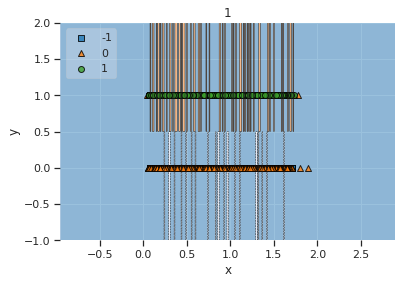

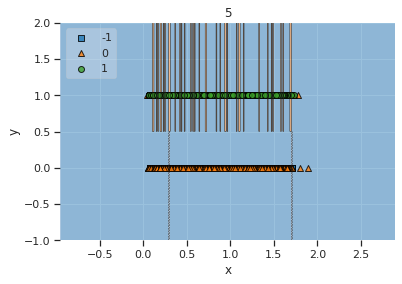

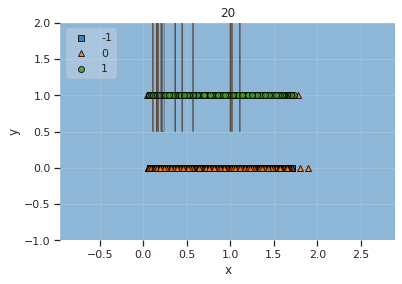

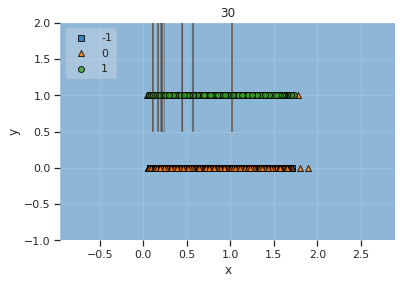

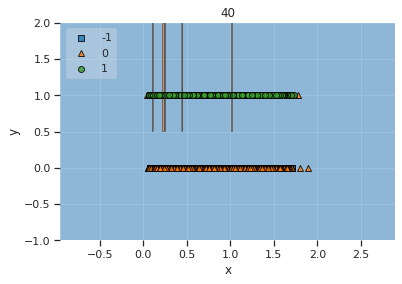

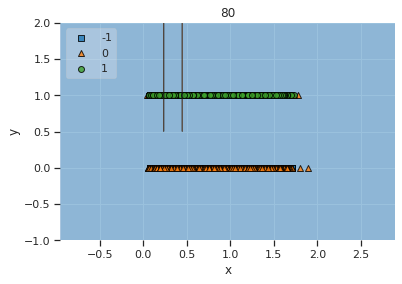

In [322]:
data1 = pd.read_csv('all_features_by_state_test.csv')
for i in [1,5,20,30,40,80]:
    knn_comparison(data1, i)

Overfitting is when a model has random error/noise and not the expected relationship. If a model has a large number of parameters or is too complex, there can be overfitting. This leads to bad performance because minor changes to training data highly changes the model’s result.
Underfitting is when a model is not able to understand the trends in the data. This can happen if you try to fit a linear model to non-linear data. This also results in bad performance.

Evaluate the model

In [331]:
#F1-Score -  takes into account the false positives
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.99      0.18      0.30       896
           0       0.88      1.00      0.93     10978
           1       0.94      0.25      0.39      1041

   micro avg       0.88      0.88      0.88     12915
   macro avg       0.94      0.47      0.54     12915
weighted avg       0.89      0.88      0.85     12915

